In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpg

In [1]:


import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile('pizza_steak.zip','r')
zip_ref.extractall()


--2021-05-14 09:59:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  84.5MB/s    in 1.2s    

2021-05-14 09:59:32 (84.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
zip_ref.close()

In [3]:
!ls pizza_steak

test  train


In [5]:
import os
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories,   {len(filenames)} files in    '{dirpath}'")

There are 2 directories,   1 files in    'pizza_steak'
There are 2 directories,   1 files in    'pizza_steak/train'
There are 0 directories,   750 files in    'pizza_steak/train/steak'
There are 0 directories,   750 files in    'pizza_steak/train/pizza'
There are 2 directories,   1 files in    'pizza_steak/test'
There are 0 directories,   250 files in    'pizza_steak/test/steak'
There are 0 directories,   250 files in    'pizza_steak/test/pizza'


In [67]:
import pathlib 
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names = class_names[1:]
print(class_names[1:])

['steak']


#View Random Image

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


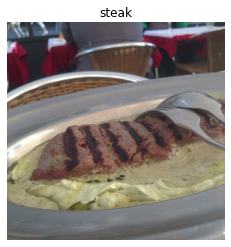

In [9]:

# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1/255.)
# test_datagen = ImageDataGenerator(rescale = 1./255.)


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [11]:
train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.1,
                                       shear_range = 0.1,
                                       zoom_range = 0.2)


In [12]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [14]:
train_data = train_datagen.flow_from_directory(train_dir,batch_size = 32, seed = 42,class_mode = 'binary',target_size = (224,224))
test_data = test_datagen.flow_from_directory(test_dir,batch_size = 32, seed =42, class_mode='binary',target_size = (224,224))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
images,labels = train_data.next()

In [16]:
len(images),len(labels)

(32, 32)

In [28]:
train_data_augmented_shuffled = train_datagen_aug.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,seed =42,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [29]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented_shuffled.next() # Note: labels aren't augmented, they stay the same

# Visualize Augemnted vs Original Image

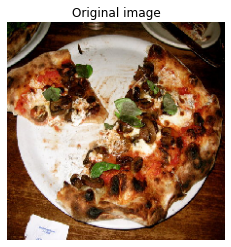

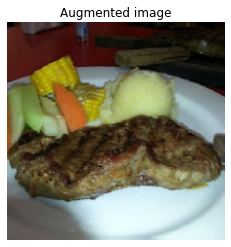

In [30]:
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

#Hisotry loss acc Plot Function

In [31]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=8, monitor = 'val_accuracy')

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


# Callbacks Early Stopping, Reduce LROnPleateau

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=8, monitor = 'val_accuracy')

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [33]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 56s 551ms/step - loss: 0.5913 - accuracy: 0.6963 - val_loss: 0.3921 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4523 - accuracy: 0.8030 - val_loss: 0.3717 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4270 - accuracy: 0.8166 - val_loss: 0.3272 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.3962 - accuracy: 0.8378 - val_loss: 0.3385 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.3595 - accuracy: 0.8477 - val_loss: 0.3507 - val_accuracy: 0.8600


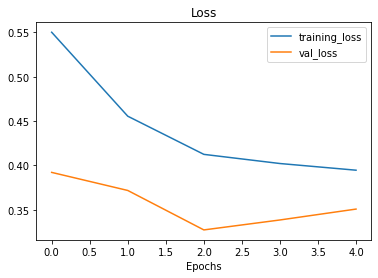

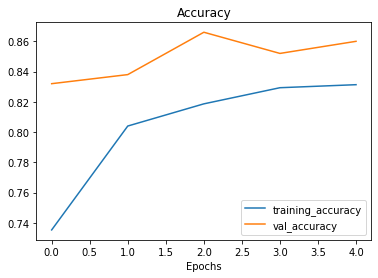

In [34]:
plot_loss_curves(history_8)

# Custom Image Prediction

--2021-05-14 10:17:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2021-05-14 10:17:23 (18.1 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



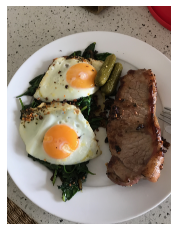

In [40]:


!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [41]:
steak.shape

(4032, 3024, 3)

#Custom Image Help Function Important






In [68]:
# def load_and_prep_image(filename, img_shape=224):
#   """
#   Reads in an image from filename, turns it into a tensor and reshapes into
#   (224, 224, 3).
#   """
#   # Read in the image
#   img = tf.io.read_file(filename)
#   # Decode it into a tensor
#   img = tf.image.decode_jpeg(img)
#   # Resize the image
#   img = tf.image.resize(img, [img_shape, img_shape])
#   # Rescale the image (get all values between 0 and 1)
#   img = img/255.
#   return img


def load_and_prep_image(filename,img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img,[img_shape,img_shape])
  img = img /255.
  return img


In [69]:
img = tf.io.read_file('03-steak.jpeg')

In [70]:
type(img)

tensorflow.python.framework.ops.EagerTensor

In [71]:
img = tf.image.decode_jpeg(img)

In [72]:
type(img)

tensorflow.python.framework.ops.EagerTensor

In [73]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [74]:
# model_8.predict(tf.expand_dims(steak,axis = 0))

In [75]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [76]:
pred = model_8.predict(steak)
pred

array([[0.86339426]], dtype=float32)

In [77]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [78]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [81]:
pred[0][0]

0.86339426

# Function Predict Custom Image and Plot The Image

In [82]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

# Final Predictions on Custom Images

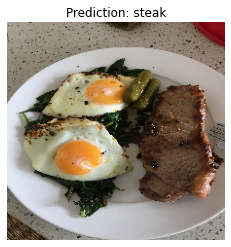

In [83]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2021-05-14 10:25:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2021-05-14 10:26:00 (19.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



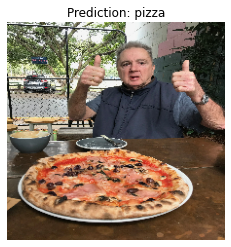

In [84]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

--2021-05-14 10:27:05--  https://upload.wikimedia.org/wikipedia/commons/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657369 (642K) [image/jpeg]
Saving to: ‘Eq_it-na_pizza-margherita_sep2005_sml.jpg.1’

Eq_it-na_pizza-marg 100%[===================>] 641.96K  2.93MB/s    in 0.2s    

2021-05-14 10:27:05 (2.93 MB/s) - ‘Eq_it-na_pizza-margherita_sep2005_sml.jpg.1’ saved [657369/657369]



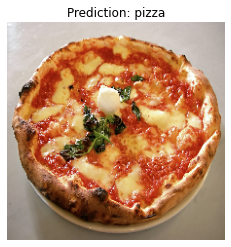

In [86]:
# https://upload.wikimedia.org/wikipedia/commons/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/a/a3/Eq_it-na_pizza-margherita_sep2005_sml.jpg
pred_and_plot(model_8, "Eq_it-na_pizza-margherita_sep2005_sml.jpg", class_names)

--2021-05-14 10:27:59--  https://i.ytimg.com/vi/nsw0Px-Pho8/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 64.233.189.119, 108.177.125.119, 74.125.23.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|64.233.189.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167624 (164K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>] 163.70K  --.-KB/s    in 0.002s  

2021-05-14 10:27:59 (84.2 MB/s) - ‘maxresdefault.jpg’ saved [167624/167624]



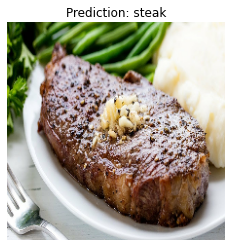

In [87]:
# https://i.ytimg.com/vi/nsw0Px-Pho8/maxresdefault.jpg
!wget https://i.ytimg.com/vi/nsw0Px-Pho8/maxresdefault.jpg
pred_and_plot(model_8, "maxresdefault.jpg", class_names)

--2021-05-14 10:29:30--  https://media-cdn.tripadvisor.com/media/photo-s/15/d8/c9/9b/img-20181205-172059-largejpg.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60659 (59K) [image/jpeg]
Saving to: ‘img-20181205-172059-largejpg.jpg.1’

img-20181205-172059 100%[===================>]  59.24K  --.-KB/s    in 0.01s   

2021-05-14 10:29:30 (4.48 MB/s) - ‘img-20181205-172059-largejpg.jpg.1’ saved [60659/60659]



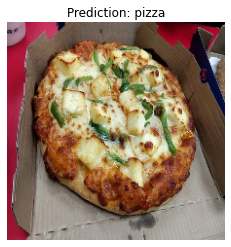

In [91]:

!wget https://media-cdn.tripadvisor.com/media/photo-s/15/d8/c9/9b/img-20181205-172059-largejpg.jpg
pred_and_plot(model_8, "img-20181205-172059-largejpg.jpg", class_names)